<a href="https://colab.research.google.com/github/shyrlee/Shirley-Xia-Portfolio/blob/main/Data%20Professionals%20Salary%20EDA%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analytics Salary Analysis**

The dataset contains salary information for data analytics professionals collected between 2020 and 2022.

## Goal

The goal of this project is to do an exploratory data analysis and discover trends and patterns with the data. By performing data cleaning and analysis using Python, this project aims to provide valuable insights about the different salary differences of different data analytics professionals.


## **Setup**

Importing the necessary libraries needed for this project

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

Getting the data from the uploaded CSV files into a DataFrame

In [6]:
ds_salaries = pd.read_csv("ds_salaries.csv")
countries = pd.read_csv("countries.csv")
usd_exchange_rates = pd.read_csv("usd_exchange_rates.csv")
experience_levels = pd.read_csv("experience_levels.csv")
employment_types = pd.read_csv("employment_types.csv")

### Looking at the data

In [7]:
ds_salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,remote_work_type,company_location,company_size,job_category
0,2020,MI,FT,Data Scientist,70000.0,EUR,DE,0,On-site only,DE,L,Data Science
1,2020,SE,FT,Machine Learning Scientist,260000.0,USD,JP,0,On-site only,JP,S,Machine Learning
2,2020,SE,FT,Big Data Engineer,85000.0,GBP,GB,50,Hybrid,UK,M,Data Engineering
3,2020,MI,FT,Product Data Analyst,20000.0,USD,HN,0,On-site only,HN,S,Data Analyst
4,2020,SE,FT,Machine Learning Engineer,150000.0,USD,US,50,Hybrid,US,L,Machine Learning


## **Cleaning the data**


Making a copy of the raw data to work on

In [8]:
ds_salaries_clean = ds_salaries.copy()
ds_salaries_clean

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,remote_work_type,company_location,company_size,job_category
0,2020,MI,FT,Data Scientist,70000.0,EUR,DE,0,On-site only,DE,L,Data Science
1,2020,SE,FT,Machine Learning Scientist,260000.0,USD,JP,0,On-site only,JP,S,Machine Learning
2,2020,SE,FT,Big Data Engineer,85000.0,GBP,GB,50,Hybrid,UK,M,Data Engineering
3,2020,MI,FT,Product Data Analyst,20000.0,USD,HN,0,On-site only,HN,S,Data Analyst
4,2020,SE,FT,Machine Learning Engineer,150000.0,USD,US,50,Hybrid,US,L,Machine Learning
...,...,...,...,...,...,...,...,...,...,...,...,...
1251,2022,MI,FT,Data Engineer,45000.0,GBP,GB,100,Fully remote,UK,M,Data Engineering
1252,2022,SE,FT,Data Scientist,260000.0,USD,US,100,Fully remote,US,M,Data Science
1253,2022,SE,FT,Data Science Engineer,60000.0,USD,AR,100,Fully remote,MX,L,Data Engineering
1254,2022,MI,FT,Data Engineer,63900.0,USD,US,0,On-site only,US,M,Data Engineering


Getting familiar with the dataset by exploring the data and its structure.

In [9]:
ds_salaries_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           1256 non-null   int64  
 1   experience_level    1256 non-null   object 
 2   employment_type     1256 non-null   object 
 3   job_title           1230 non-null   object 
 4   salary              1228 non-null   float64
 5   salary_currency     1252 non-null   object 
 6   employee_residence  1256 non-null   object 
 7   remote_ratio        1256 non-null   int64  
 8   remote_work_type    1174 non-null   object 
 9   company_location    1256 non-null   object 
 10  company_size        1240 non-null   object 
 11  job_category        1230 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 117.9+ KB


#### Checking for missing data

In [10]:
ds_salaries_clean.isna().sum()

work_year              0
experience_level       0
employment_type        0
job_title             26
salary                28
salary_currency        4
employee_residence     0
remote_ratio           0
remote_work_type      82
company_location       0
company_size          16
job_category          26
dtype: int64

In [11]:
ds_salaries_clean = ds_salaries_clean.dropna(subset=["salary","company_size"]).reset_index(drop=True)

#### Test

Verify that the data have been dropped

In [12]:
assert ds_salaries_clean.salary.isna().sum() == 0
assert ds_salaries_clean.company_size.isna().sum() == 0

ds_salaries_clean.isna().sum()

work_year              0
experience_level       0
employment_type        0
job_title              0
salary                 0
salary_currency        0
employee_residence     0
remote_ratio           0
remote_work_type      82
company_location       0
company_size           0
job_category           0
dtype: int64

Finding the missing values for the `remote_work_type` column by using the `remote_ratio`



In [13]:
onsite_only = ds_salaries_clean.loc[ds_salaries_clean.remote_ratio == 0]
ds_salaries_clean.loc[onsite_only.index, 'remote_work_type'] = 'On-site only'

Hybrid = ds_salaries_clean.loc[ds_salaries_clean.remote_ratio == 50]
ds_salaries_clean.loc[Hybrid.index, 'remote_work_type'] = 'Hybrid'

fully_remote = ds_salaries_clean.loc[ds_salaries_clean.remote_ratio == 100]
ds_salaries_clean.loc[fully_remote.index,'remote_work_type'] = "Fully remote"

#### Test


In [14]:
assert ds_salaries_clean.remote_work_type.isna().sum() == 0
values = list(ds_salaries_clean.remote_work_type.unique())
values_check = ['On-site only', 'Fully remote', 'Hybrid']

assert  len(values) == len(values_check) and len([i for i in values if i in values_check]) == 3

assert ds_salaries_clean.isna().sum().sum() == 0

#### Currency conversion

The salaries are all in different currencies, so I'm going to convert them all to USD$

In [15]:
usd_exchange_rates.head()

,iso_code,exchange_rate,ref_date
0,ALL,108.650,2020
1,ARS,70.539,2020
2,AUD,1.453,2020
3,EUR,0.876,2020
4,BRL,5.155,2020


In [16]:
# Joining tables with 'ds_salaries_clean'
ds_salaries_clean = pd.merge(
    ds_salaries_clean,
    usd_exchange_rates,
    left_on = ["salary_currency"],
    right_on = ["iso_code"]
)

In [17]:
ds_salaries_clean.loc[:, "salary_in_usd"] = round(ds_salaries_clean['salary']/ds_salaries_clean['exchange_rate'])

Merging the DataFrames together to translate a few columns with abbreviations (`experience_level`, `employment_type`, and `company_location`).


In [18]:
ds_salaries_clean = pd.merge(
    ds_salaries_clean,
    experience_levels,
    left_on = ["experience_level"],
    right_on = ["abbreviation"]
)

ds_salaries_clean = pd.merge(
    ds_salaries_clean,
    employment_types,
    left_on = ["employment_type"],
    right_on = ["abbreviation"]
)

ds_salaries_clean = pd.merge(
    ds_salaries_clean,
    countries,
    left_on = ["company_location"],
    right_on = ["abbreviation"]
)

In [19]:
# Drop excess columns
ds_salaries_clean = ds_salaries_clean.drop(["abbreviation_x", "abbreviation_y", "abbreviation", "iso_code", "ref_date"], axis = 1)

#### Test


In [20]:
dropped_cols = ['abbreviation_x','abbreviation_y', 'abbreviation', 'iso_code', 'ref_date']
assert len([i for i in ds_salaries_clean if i in dropped_cols]) == 0

#### Checking and dropping duplicate data

In [21]:
# Checking for duplicate data
ds_salaries_clean.duplicated()

0        False
1         True
2         True
3         True
4         True
         ...  
58107     True
58108     True
58109     True
58110     True
58111     True
Length: 58112, dtype: bool

True means that there are duplicated rows

In [22]:
ds_salaries_clean = ds_salaries_clean.drop_duplicates()
ds_salaries_clean.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,remote_work_type,company_location,company_size,job_category,exchange_rate,salary_in_usd,experience_level_description,employment_type_description,country_name
0,2020,MI,FT,Data Scientist,70000.0,EUR,DE,0,On-site only,DE,L,Data Science,0.8760,79909.0,Mid-level (Junior),Full-time,Germany
8,2020,MI,FT,Data Scientist,70000.0,EUR,DE,0,On-site only,DE,L,Data Science,0.8450,82840.0,Mid-level (Junior),Full-time,Germany
16,2020,MI,FT,Data Scientist,70000.0,EUR,DE,0,On-site only,DE,L,Data Science,1.0093,69355.0,Mid-level (Junior),Full-time,Germany
48,2020,MI,FT,Data Engineering Manager,51999.0,EUR,DE,100,Fully remote,DE,S,Leadership (DE),0.8760,59360.0,Mid-level (Junior),Full-time,Germany
56,2020,MI,FT,Data Engineering Manager,51999.0,EUR,DE,100,Fully remote,DE,S,Leadership (DE),0.8450,61537.0,Mid-level (Junior),Full-time,Germany



#### Test

Last test to make sure there are no null or duplicated values before turning the data into a .csv file

In [23]:
# Test for null values
assert ds_salaries_clean.isna().sum().sum() == 0
# Test for duplicates
assert ds_salaries_clean.duplicated().sum() == 0

In [24]:
# Writing the cleaned table to a csv file

ds_salaries_clean.to_csv("ds_salaries_clean.csv", index=False)

## **Exploration and Analysis**


### What is the average overall salary (regardless of year) by job category?


               Job Category  Average Salary
0   Artificial Intelligence         53624.0
1              Data Analyst         79792.0
2          Machine Learning         84949.0
3              Data Science         87928.0
4          Data Engineering         91836.0
5                  Research         96831.0
6           Leadership (ML)         99522.0
7           Leadership (DE)        107245.0
8           Leadership (DA)        127134.0
9           Leadership (DS)        144782.0
10           Data Architect        160242.0


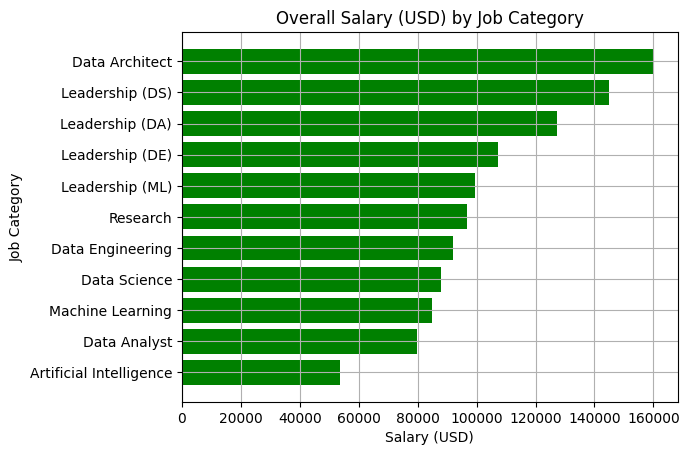

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

new_df = ds_salaries_clean.loc[:,['job_category','salary_in_usd']].groupby('job_category').mean().sort_values(by = 'salary_in_usd')
new_df = new_df.round()
new_df = new_df.rename_axis(index='Job Category').reset_index()
new_df = new_df.rename(columns={"salary_in_usd": "Average Salary"})
print(new_df)

plt.title("Overall Salary (USD) by Job Category")
plt.ylabel("Job Category")
plt.xlabel("Salary (USD)")
plt.barh(new_df['Job Category'], new_df['Average Salary'], color = "green")

plt.grid()


### What is the average salary by job category and experience level (regardless of year)?

In [26]:
new_df = round(ds_salaries_clean.loc[:,['job_category', 'experience_level_description', 'salary_in_usd']].groupby(['job_category', 'experience_level_description']).mean())
new_df = new_df.rename_axis(index=['Job Category', 'Experience Level'])
new_df = new_df.rename(columns={"salary_in_usd": "Average Salary"})
print(new_df)

                                                             Average Salary
Job Category            Experience Level                                   
Artificial Intelligence Entry-level                                 49388.0
                        Mid-level (Junior)                          75547.0
                        Senior-level (Intermediate)                 32867.0
Data Analyst            Entry-level                                 48587.0
                        Executive-level / Director (Expert)        130000.0
                        Mid-level (Junior)                          63285.0
                        Senior-level (Intermediate)                112214.0
Data Architect          Mid-level (Junior)                         166667.0
                        Senior-level (Intermediate)                158490.0
Data Engineering        Entry-level                                 41695.0
                        Executive-level / Director (Expert)        223613.0
            

### In which country do data analysts make the most money on average? Which country do they make the least?


           Country  Average Salary
0         Pakistan          8000.0
1            Kenya          9272.0
2          Nigeria         10000.0
3            India         12341.0
4         Honduras         20000.0
5            Spain         21420.0
6           Greece         36015.0
7           France         50289.0
8   United Kingdom         52416.0
9       Luxembourg         55263.0
10         Germany         59684.0
11          Canada         73712.0
12         Denmark         82894.0
13   United States        114920.0


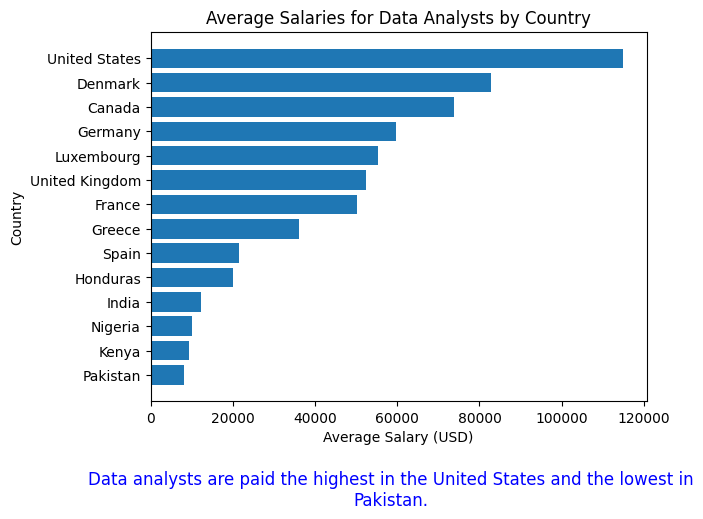

In [27]:
newdf = ds_salaries_clean[ds_salaries_clean.job_category == 'Data Analyst']
newdf = round(newdf.loc[:,['country_name', 'salary_in_usd']].groupby('country_name').mean()).sort_values(by='salary_in_usd')
newdf = newdf.rename_axis(index='Country').reset_index()
newdf = newdf.rename(columns={"salary_in_usd": "Average Salary"})
print(newdf)

plt.title("Average Salaries for Data Analysts by Country")
plt.xlabel("Average Salary (USD)")
plt.ylabel("Country")

#caption highlighting where data analysts are paid the highest and lowest
txt="Data analysts are paid the highest in the United States and the lowest in Pakistan."
plt.figtext(0.5, -.1, txt, wrap=True, horizontalalignment='center', fontsize=12, color = "b")

plt.barh(newdf['Country'],newdf['Average Salary'])
plt.show()

### Which job category earns more on average: Data Analyst, Data Science, or Data Engineering?

       Job Category  Average Salary
0      Data Analyst         79792.0
1      Data Science         87928.0
2  Data Engineering         91836.0


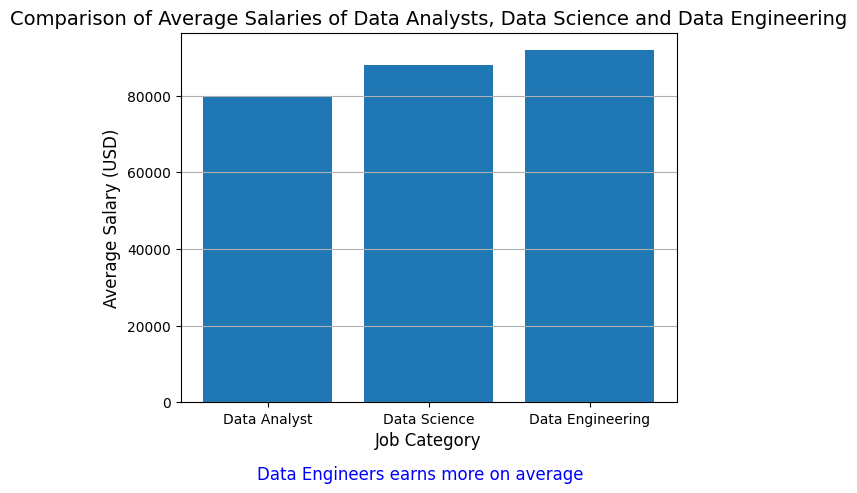

In [28]:
newdf = ds_salaries_clean[ds_salaries_clean.job_category.isin(["Data Analyst", "Data Science", "Data Engineering"])]
newdf = round(newdf.loc[:,['job_category', 'salary_in_usd']].groupby('job_category').mean()).sort_values(by='salary_in_usd')
newdf = newdf.rename_axis(index='Job Category').reset_index()
newdf = newdf.rename(columns={"salary_in_usd": "Average Salary"})
print(newdf)

plt.title("Comparison of Average Salaries of Data Analysts, Data Science and Data Engineering", fontsize = 14)
plt.xlabel("Job Category", fontsize = 12)
plt.ylabel("Average Salary (USD)", fontsize = 12)

txt="Data Engineers earns more on average"
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12, color = "b")

plt.bar(newdf['Job Category'],newdf['Average Salary'])
plt.grid(axis="y")
plt.show()

### Which job category pays the most on average in 2022?

In [29]:
newdf = ds_salaries_clean[ds_salaries_clean.work_year == 2022]
newdf = round(newdf.loc[:,['job_category', 'salary_in_usd']].groupby('job_category').mean()).sort_values(by='salary_in_usd', ascending = False)

newdf = newdf.rename_axis(index='Job Category').reset_index()
newdf = newdf.rename(columns={"salary_in_usd": "Average Salary"})
print(newdf.head(1))

print("\n In 2022, Data Architects have the highest average salary")

     Job Category  Average Salary
0  Data Architect        182077.0

 In 2022, Data Architects have the highest average salary


### How are companies working in 2022 (Remote, In-Office, Hybrid)?


Fully remote    497
Hybrid          224
On-site only    207
Name: remote_work_type, dtype: int64


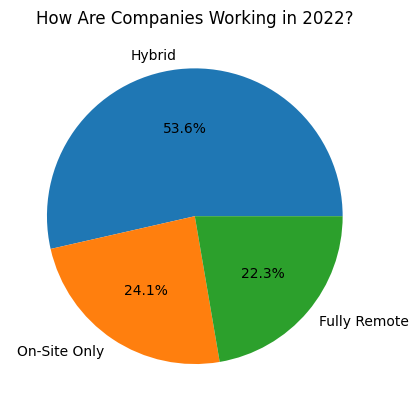

A majority of companies are working with a Hybrid work system.

54% of companies are working Hybrid, 23% of companies are working On-Site only, and 22% are working fully remote.


In [30]:
work_type_counts = ds_salaries_clean.loc[:, 'remote_work_type'].value_counts()
print(work_type_counts)

plt.title("How Are Companies Working in 2022?")
plt.pie(work_type_counts, labels = ['Hybrid', 'On-Site Only', 'Fully Remote'], autopct = '%0.1f%%')
plt.show()

print("A majority of companies are working with a Hybrid work system." )
print("\n54% of companies are working Hybrid, 23% of companies are working On-Site only, and 22% are working fully remote.")

## **Conclusion**

I completed my exploratory data analysis by using various graphs and tables to compare the average salaries of data professionals in different countries and company sizes. I found that data analysts make the most in the United States, with an average salary of ```$```117,000. While the least paid data analysts are in Pakistan, with an average salary of ```$```8,000. Additionally, data architecture is the highest-paying job category in 2022, and almost 70% of companies are working remotely.